<span style="color:blue; font-family:Georgia; font-size:22px;">📌 Project Title: Online Gaming Behavior Analysis</span>

## 🎯 **Introduction**  
In today's **digital era**, online gaming has become a significant part of **entertainment and social interaction**.  
Understanding **player behavior** is crucial for **game developers** to:  

-  **Enhance user experience**  
-  **Increase engagement**  
-  **Improve game design**  

This project **analyzes online gaming behavior** using **machine learning techniques** to **predict player engagement levels** effectively.  

---

## ❗ **Problem Statement**  
The **gaming industry** faces challenges in identifying **factors that influence player engagement**.  

-  Some players **lose interest and discontinue games**.  
-  Others become **highly engaged**, affecting retention strategies.  

📌 **Objective:**  
This project aims to **develop a predictive model** that classifies players based on their **engagement levels**.  

✅ By analyzing:  
- **Gameplay patterns**   
- **Session duration**   
- **In-game activities**  

We aim to **provide valuable insights** to **help game developers improve user retention** and enhance the **overall gaming experience**.  
 


In [2]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
path = r"C:\Users\Vaishnavi B\Downloads\online_gaming_behavior_dataset.csv"
df=pd.read_csv(path)
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [3]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [6]:
df=df.drop("PlayerID",axis=1)

In [7]:
df["EngagementLevel"].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

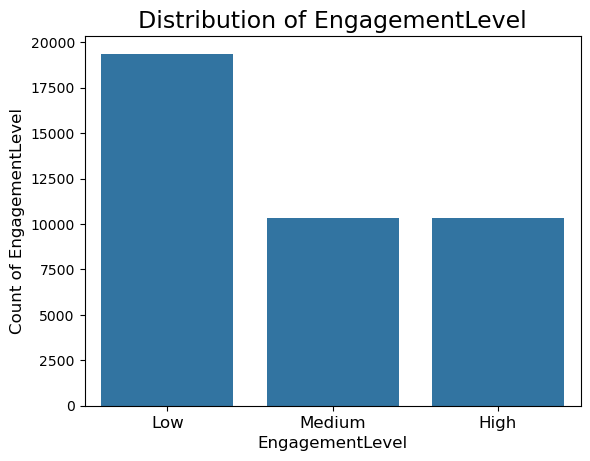

In [8]:
df# Distribution of the target variable
sns.countplot(x="EngagementLevel",data=df)
plt.title("Distribution of EngagementLevel",fontsize=17,c="k")
plt.xlabel("EngagementLevel",fontsize=12)
plt.ylabel("Count of EngagementLevel",fontsize=12)
plt.xticks([0, 1,2], ['Low', 'Medium','High'], fontsize=12)
plt.show()

In [9]:
columns_to_check = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

for col in columns_to_check:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("---------------------------") 


Unique values in 'Gender':
['Male' 'Female']
---------------------------
Unique values in 'Location':
['Other' 'USA' 'Europe' 'Asia']
---------------------------
Unique values in 'GameGenre':
['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']
---------------------------
Unique values in 'GameDifficulty':
['Medium' 'Easy' 'Hard']
---------------------------
Unique values in 'EngagementLevel':
['Medium' 'High' 'Low']
---------------------------


In [10]:
df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [11]:
gender={'Male':0 ,'Female':1}
df["Gender"]=df["Gender"].map(gender)

In [12]:
# Define mapping dictionaries for each column
mappings = {
    'Location': {'Other': 0, 'USA': 1, 'Europe': 2, 'Asia': 3},
    'GameGenre': {'Strategy': 0, 'Sports': 1, 'Action': 2, 'RPG': 3, 'Simulation': 4},
    'GameDifficulty': {'Easy': 0, 'Medium': 1, 'Hard': 2}
}

# Apply mapping using a loop (excluding EngagementLevel)
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

# Check the transformed DataFrame
# print(df.head())


In [13]:
df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,0,0,0,16.271119,0,1,6,108,79,25,Medium
1,29,1,1,0,5.525961,0,1,5,144,11,10,Medium
2,22,1,1,1,8.223755,0,0,16,142,35,41,High
3,35,0,1,2,5.265351,1,0,9,85,57,47,Medium
4,33,0,2,2,15.531945,0,1,2,131,95,37,Medium


In [14]:
target_map={'Medium':1 ,'High':2, 'Low':0}
df["EngagementLevel"]=df["EngagementLevel"].map(target_map)

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
numerical_columns = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
scaler = MinMaxScaler()

# Apply normalization
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,0.823529,0,0,0,0.677973,0.0,1,0.315789,0.579882,0.795918,0.510204,1
1,0.411765,1,1,0,0.230249,0.0,1,0.263158,0.792899,0.102041,0.204082,1
2,0.205882,1,1,1,0.342659,0.0,0,0.842105,0.781065,0.346939,0.836735,2
3,0.588235,0,1,2,0.219390,1.0,0,0.473684,0.443787,0.571429,0.959184,1
4,0.529412,0,2,2,0.647174,0.0,1,0.105263,0.715976,0.959184,0.755102,1


## PRIMARY MODELS 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Split the data
X = df.drop('EngagementLevel', axis=1)  # Features
y = df['EngagementLevel']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store the results
results = {}

# Loop through the models, train them, and evaluate their performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the results
    results[model_name] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


                     accuracy  precision    recall  f1-score
Logistic Regression  0.821281   0.823424  0.821281  0.819833
Random Forest        0.909704   0.909949  0.909704  0.909356
Gradient Boosting    0.906332   0.906603  0.906332  0.905955


# FINAL MODEL

 ## Random Forest Classifier with the best hyperparameters-- RandomizedSearchCV

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split node
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'max_features': ['sqrt', 'log2']  # Number of features for best split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to test
    cv=3,  # Cross-validation folds
    scoring='accuracy', 
    n_jobs=-1,  # Use all available processors
    verbose=2, 
    random_state=42
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Accuracy: 0.9096
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      2093
           1       0.90      0.95      0.93      3879
           2       0.92      0.87      0.90      2035

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



In [21]:
fmodel=RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, max_features= 'log2', max_depth= None,random_state=42)

In [22]:
fmodel.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [23]:
y_predf=fmodel.predict(X_test)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test,y_predf))

Accuracy: 0.9096
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2093
           1       0.90      0.95      0.93      3879
           2       0.92      0.87      0.90      2035

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



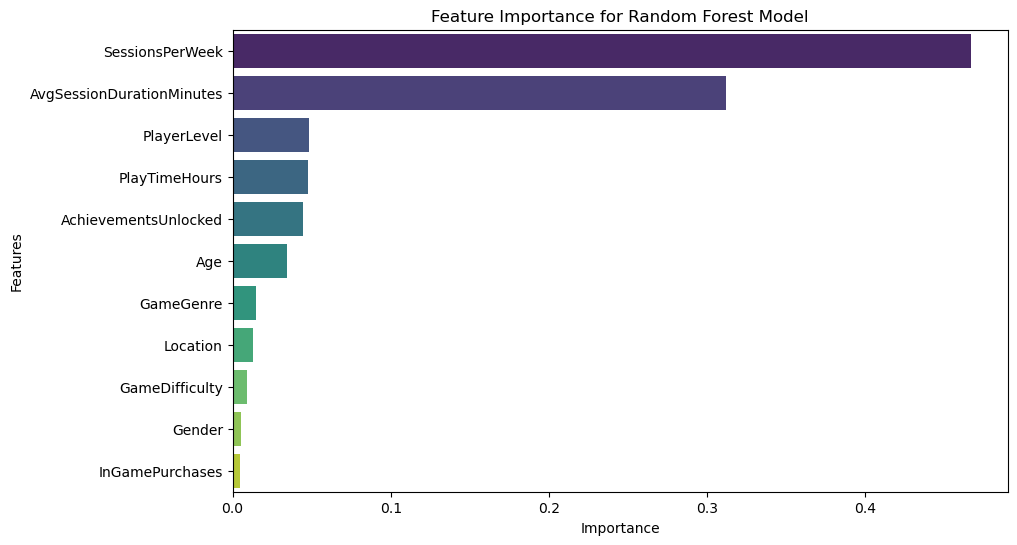

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the trained model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})

# Sort the importance values in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis',hue='Feature')
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show();


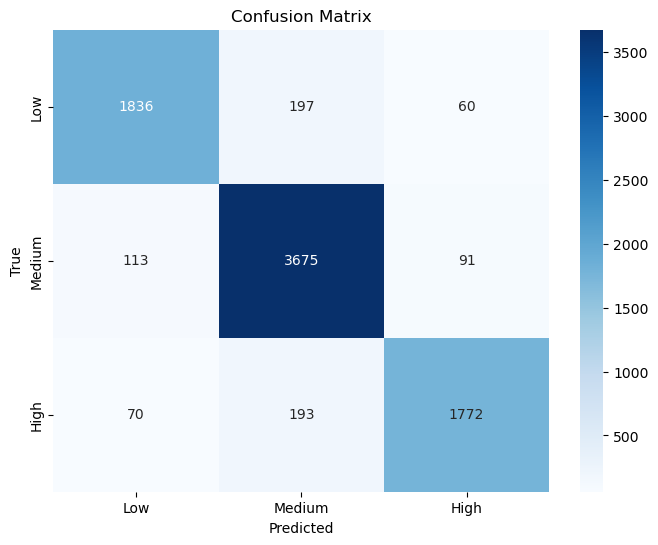

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


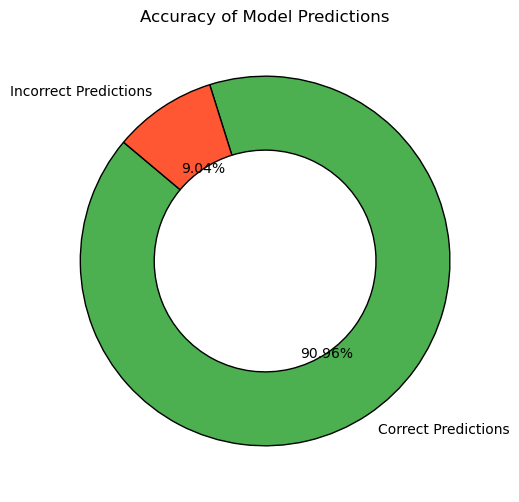

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a new column 'PredictionCorrect' based on whether the prediction matches the actual label
df_results = pd.DataFrame({'True Labels': y_test, 'Predictions': y_pred})
df_results['PredictionCorrect'] = df_results['True Labels'] == df_results['Predictions']

# Step 2: Count the number of correct and incorrect predictions
correct_predictions = df_results['PredictionCorrect'].sum()
incorrect_predictions = len(df_results) - correct_predictions

# Step 3: Calculate the percentages
correct_percentage = (correct_predictions / len(df_results)) * 100
incorrect_percentage = (incorrect_predictions / len(df_results)) * 100

# Step 4: Create a donut chart to visualize the accuracy with a larger hole
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_percentage, incorrect_percentage]
colors = ['#4CAF50', '#FF5733']  # Green for correct, red for incorrect

# Plot the donut chart with a larger hole
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black', 'width': 0.4})

# Add title
plt.title('Accuracy of Model Predictions')

# Display the donut chart
plt.show()


Precision vs Recall:

    Precision focuses on how many of the predicted positives are actually positive.
    Recall focuses on how many of the actual positives are correctly identified by the model.

In [28]:
import joblib

# Save the model to a file
joblib.dump(fmodel, 'random_forest_model.pkl')
print("Model saved successfully.")


Model saved successfully.


In [29]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

<span style="color:blue; font-family:Georgia; font-size:22px;">Final Model Evaluation</span>

### 🌟 Random Forest Model for Player Engagement Prediction  

The **Random Forest model** is highly effective for predicting the **engagement level** of players based on features such as:  

- **Playtime**
- **Age & Gender**
- **Game Difficulty**  

📊 **Performance Insights:**  
- Achieved an **accuracy of 90.96%** after **hyperparameter tuning** using **RandomizedSearchCV**.  
- **Solid performance across all classes**, with high **precision, recall, and F1-scores**, especially for **Medium & High engagement levels**.  
- Tuning **n_estimators** and **max_depth** improved the model’s predictive power.  

### ⚠️ Limitations  
🔹 **Interpretability** – Hard to explain individual predictions.  
🔹 **Overfitting** – Needs careful tuning to avoid learning noise.  
🔹 **Computational Cost** – High for **large datasets**.  

### 🌍 Real-World Applications  
💡 **Player Behavior Prediction** – Identify patterns to improve engagement.  
💡 **Customer Segmentation** – Personalize gaming experiences.  
💡 **Marketing & Retention Strategies** – Improve user retention.  

📌 **Next Steps:**  
To make the model more applicable in **complex environments**, improvements in **feature engineering** and **model explainability** are needed.  

  


### Model Deployment on Streamlit

I have successfully deployed the **Gaming Behavior Engagement Level Prediction Model** using **Streamlit**.  
The application takes user inputs for various gaming-related parameters and predicts engagement levels.
### Sample Images 
#### Prediction Output - Low
<img src="https://github.com/bhujbalvaishnavi143/Online-Gaming-Behaviour-Prediction-Model/blob/main/Screenshot%202025-02-07%20171841.png?raw=true" width="600">

#### Prediction Output - High 
<img src="https://github.com/bhujbalvaishnavi143/Online-Gaming-Behaviour-Prediction-Model/blob/main/Screenshot%202025-02-07%20171918.png?raw=true" width="600">
